# Ein kleiner Blick über den Tellerrand…
- Bild Lena einlesen


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

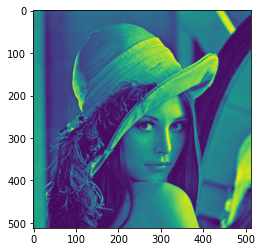

In [11]:
# Bild einlesen (Paket matplotlib) und anzeigen (Datei 'lena.png')
img = plt.imread('lena/lena.png')
# anzeige in fehlfarben, da nicht angegeben wurde dass es grustufen sind
plt.imshow(img) 

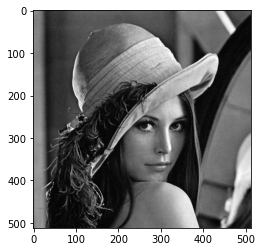

In [13]:
plt.imshow(img, cmap='gray')


In [17]:
# Bild als datentyp anzeigen
print(img.shape) # zeigt grösse


(512, 512)


## Experiment 1: Verteilung der Varianz 
- PCA machen

In [39]:
model = PCA().fit(img)
x = np.arange(10)
x=x+1
x


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [35]:
np.cumsum(x) # cumulierte werte 

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55])

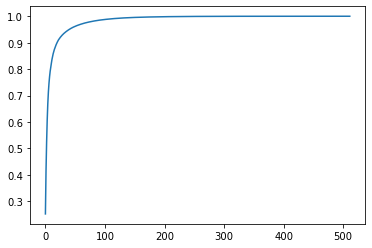

In [41]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
# verteilung der Varianz auf die Komponenten 

mehr als 100 Komponenten werden nicht benötigt, die meiste information ist in den ersten ca. 20 hauptkomponenten enthalten 
Feine Details sind im Long tail enthalten 

In [49]:
# Reduktion der Ebenen
# Experiment 2: Hauptkomponentenzerlegung mit x% Varianz (0.x)
# 30% der Varianz erhalten, 70 wegschmeisssen
model= PCA(0.3) 
# Projektion der reduzierten daten im normalen Raum wieder 
img_proj = model.fit_transform(img)
model.n_components_ # es werden dafür nur zwei Komponenten benötigt 

2

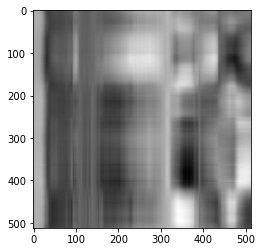

In [55]:
# Rückprojektion in den vorherigen Raum 
img_rec = model.inverse_transform(img_proj)
plt.imshow(img_rec, cmap='gray')

4


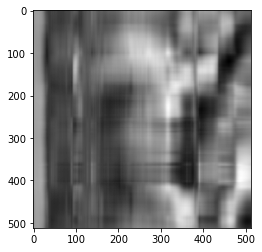

In [59]:
# Nochmal mit 60% Varianz
model= PCA(0.6)
img_proj = model.fit_transform(img)
print(model.n_components_)
img_rec = model.inverse_transform(img_proj)
plt.imshow(img_rec, cmap='gray')

21


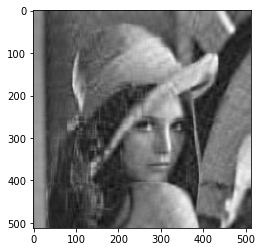

In [63]:
# Nochmal mit 90% Varianz
model= PCA(0.90)
img_proj = model.fit_transform(img)
print(model.n_components_)
img_rec = model.inverse_transform(img_proj)
plt.imshow(img_rec, cmap='gray')

100


array([0.25223643, 0.4139447 , 0.52327543, 0.60696477, 0.66932774,
       0.7140026 , 0.74669504, 0.77204555, 0.7922485 , 0.8082506 ,
       0.8224519 , 0.8365384 , 0.84758437, 0.8580534 , 0.86689943,
       0.87413836, 0.88058907, 0.8869565 , 0.89251834, 0.89764166,
       0.9023732 , 0.9066229 , 0.91081   , 0.9141974 , 0.91725737,
       0.9202299 , 0.92304575, 0.92571336, 0.92818975, 0.93059945,
       0.93278575, 0.9349103 , 0.93690944, 0.93882036, 0.9406427 ,
       0.9424024 , 0.9441011 , 0.94571334, 0.9472592 , 0.9487889 ,
       0.95024985, 0.95165116, 0.95299655, 0.95426804, 0.9555345 ,
       0.95671225, 0.95786434, 0.95895237, 0.9599805 , 0.9609929 ,
       0.96196735, 0.9629337 , 0.96386045, 0.96475184, 0.9656123 ,
       0.9664542 , 0.9672784 , 0.9680633 , 0.96882075, 0.96956146,
       0.9702897 , 0.970989  , 0.9716797 , 0.9723449 , 0.97300446,
       0.9736448 , 0.9742676 , 0.97486615, 0.9754509 , 0.97599703,
       0.9765405 , 0.97707224, 0.9775828 , 0.9780765 , 0.97856

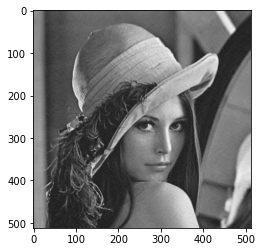

In [71]:
# Nochmal mit 100 Hauptkomponenten
model= PCA(100)
img_proj = model.fit_transform(img)
print(model.n_components_)
img_rec = model.inverse_transform(img_proj)
plt.imshow(img_rec, cmap='gray')
np.cumsum(model.explained_variance_ratio_)

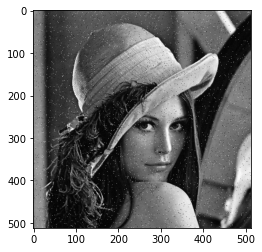

In [78]:
# Experiment 3: Entrauschung (Datei 'lena_noise.png')
img_noise = plt.imread('lena/lena_noise.png')
plt.imshow(img_noise, cmap='gray')
model = PCA(0.9)
de_noise = model.inverse_transform(model.fit_transform(noise))

84


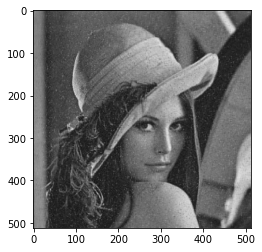

In [79]:
model= PCA(0.90)
img_noise_proj = model.fit_transform(img_noise)
print(model.n_components_)
img_noise_rec = model.inverse_transform(img_noise_proj)
plt.imshow(img_noise_rec, cmap='gray')

# Experiment 4: Farbraumreduzierung (Datei 'lena_color.png')
- Echtfarbenbild (16.8 Millionen Farben) auf 16 Farben reduzieren
- Reduktion anhand des Clusteralgorithmus k-Mitten

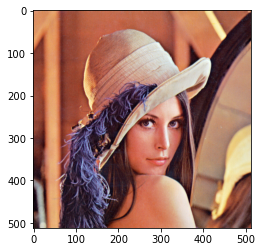

In [80]:
img_color = plt.imread('lena/lena_color.png')
plt.imshow(img_color)

In [83]:
img_color.shape # 512x512 x RGB

(512, 512, 3)

In [86]:
#reshape für k-mitten, da die datenstruktur zu viele Dimensionen hat
data = np.reshape(img_color, (512*512,3))
data.shape

(262144, 3)

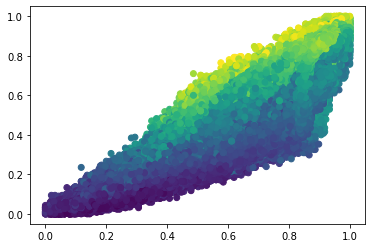

In [87]:
plt.scatter(data[:,0],data[:,1], c=data[:,2])


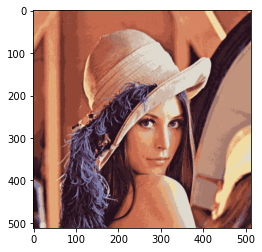

In [94]:
from sklearn.cluster import KMeans
model = KMeans(16) # 16 cluster = 16 farben
model.fit(data)
data_reduced = model.cluster_centers_[model.predict(data)]
img16 = np.reshape(data_reduced, (512,512,3))
plt.imshow(img16)